
🔍 Modelo: SVM
✅ Precisión: 0.88
              precision  recall  f1-score  support
0                  0.88    0.92      0.90   106.00
1                  0.87    0.82      0.84    71.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.87    0.87      0.87   177.00
weighted avg       0.88    0.88      0.88   177.00


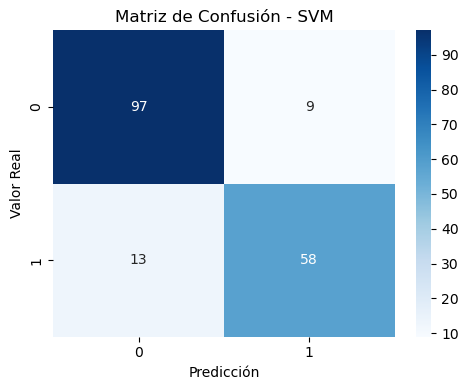


🔍 Modelo: KNN
✅ Precisión: 0.88
              precision  recall  f1-score  support
0                  0.88    0.92      0.90   106.00
1                  0.88    0.80      0.84    71.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.88    0.86      0.87   177.00
weighted avg       0.88    0.88      0.87   177.00


C:\Users\PC-01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


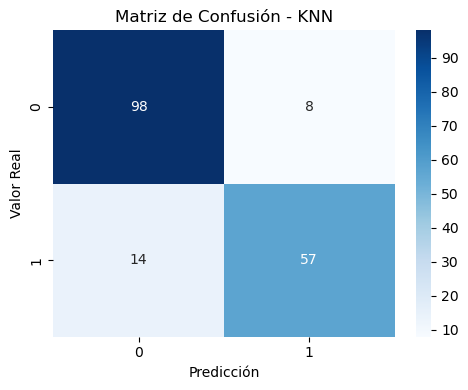


🔍 Modelo: Random Forest
✅ Precisión: 0.88
              precision  recall  f1-score  support
0                  0.89    0.92      0.90   106.00
1                  0.87    0.83      0.85    71.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.88    0.87      0.88   177.00
weighted avg       0.88    0.88      0.88   177.00


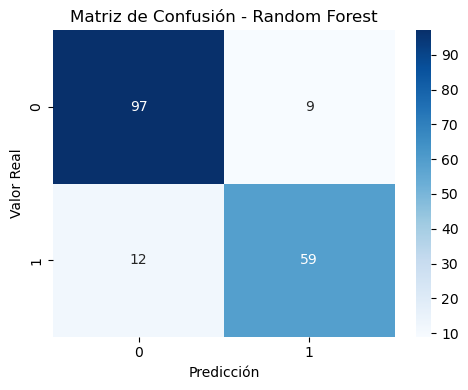


🔍 Modelo: Logistic Regression
✅ Precisión: 0.87
              precision  recall  f1-score  support
0                  0.88    0.91      0.89   106.00
1                  0.85    0.82      0.83    71.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.87    0.86      0.86   177.00
weighted avg       0.87    0.87      0.87   177.00


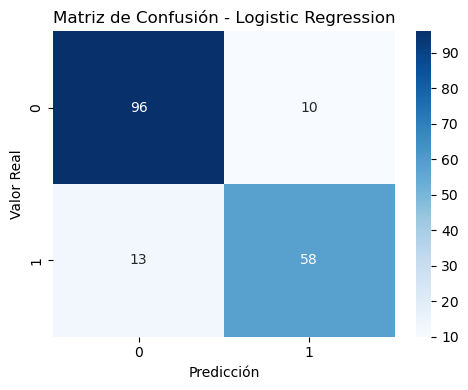


🔍 Modelo: Naive Bayes
✅ Precisión: 0.88
              precision  recall  f1-score  support
0                  0.92    0.88      0.90   106.00
1                  0.83    0.89      0.86    71.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.87    0.88      0.88   177.00
weighted avg       0.88    0.88      0.88   177.00


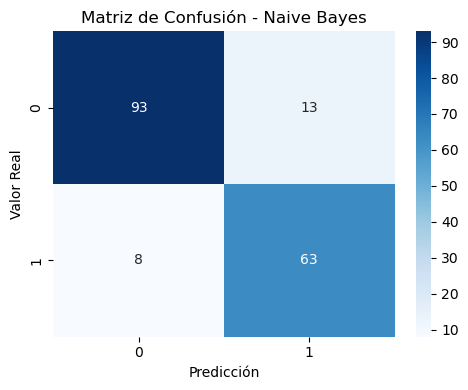


🔍 Modelo: Decision Tree
✅ Precisión: 0.86
              precision  recall  f1-score  support
0                  0.87    0.91      0.89   106.00
1                  0.85    0.80      0.83    71.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.86    0.85      0.86   177.00
weighted avg       0.86    0.86      0.86   177.00


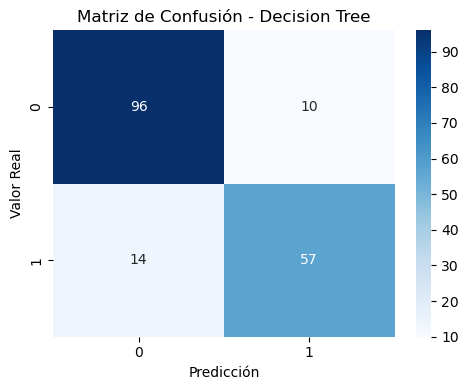

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("DATASET_RIOSAVILA_EC1.csv")

# ----------------- PREPROCESAMIENTO -----------------
X = df.drop(columns=["ID", "RESULT"])
y = df["RESULT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------- FUNCIÓN PARA EVALUAR MODELOS -----------------
def evaluar_modelo(nombre, modelo, X_train, X_test, usar_escala=True):
    print(f"\n🔍 Modelo: {nombre}")
    if usar_escala:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Precisión: {acc:.2f}")
    
    reporte = classification_report(y_test, y_pred, output_dict=True)
    df_reporte = pd.DataFrame(reporte).transpose().round(2)
    print(df_reporte)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.tight_layout()
    plt.show()

# ----------------- LISTA DE MODELOS -----------------
modelos = [
    ("SVM", SVC(kernel='linear', random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
]

# ----------------- EJECUCIÓN -----------------
for nombre, modelo in modelos:
    usar_escala = nombre in ["SVM", "KNN", "Logistic Regression"]  # estos necesitan escalado
    evaluar_modelo(nombre, modelo, X_train, X_test, usar_escala)
